# Final project report - Metadynamics

### Names: Netanel Bachar & David Stark
### IDs: 200056000 & 203865761

This is a paper performing a metadynamics simulations at $298K$ for an Argon (Ar) atom in a double well potential energy surface:   

<center>$V(x)=Ax^4-Bx^2$</center>   
where $A=4.11\cdot10^{20}Jm^{-4}, B=8.22Jm^{-2}$

Metadynamics is a method of simulation technique that allows the acceleration of rare events and estimating the free energy surface of molecular systems. In this paper we will show rare events in molecular dynamics and monte carlo methods, langevine dynamics in order to sample the canonical ensamble and implementing metadynamics in order to accelerate the sampleing of a rare event.

The paper was based on in the two articles below:

1. G.Bussi, A. Laio, Using metadynamics to explore comples free- energy landscapes.
2. A.Valsson, P.Tiwary and M. Parrinello, Enhancing Important Fluctuations: Rare Events and Metadynamics from a Conceptual Viewpoint.



    Which advanced method have you chosen to implement?

    Explain what is the problem with standard simulations the method attempts to solve.

    How does the algorithm work? Explain the physical motivation behind it.

    Discuss the limitations of the method.

    Can you think of ways to improve upon it?


## Introduction - the problem of sampling the  potential surface - rare event

The rare event that this paper will show is the Ar particle overcoming the potential barrier in a double-well potential. 

In the microcanonical ensemble (NVE), the initial conditions of the system will dictate the maximum energy that the system can be in any given time. An Ar particle in a double-well potential can be sample using the molecular dynamics (MD) method. The particle will be able to overcome the barrier between the two wells only if the initial conditions allow it. Since this is not a stochastic method, if the initial conditions are not sufficient for the particle to overcome the potential barrier, it will forever not traspass it. In the figure below, one can see the double-well potential.
<img src="Final/WellPotential.png">   

The monte carlo (MC) method (in the canonical ensemble (NVT)), is a stochastic method to sample phase space, hence, the Ar particle will have some probability to overcome the potential barrier even though it's initial conditions were not energy sufficient to overcome the barrier. If the step size in the MC method is small, the probability that "tunneling" or passing the barrier diminishes. If one want to sample the entire free energy surface (FES) one need to use a larger step size in order to enable the particle to pass and be in both potential wells. As can be seen in the figure below, using the MC method, after approximatly 20,000 steps, the Ar particle was able to pass the energy barrier when the step size increased.  


Making a few consecutive steps towards the second well is statistically unlikely especially if we consider the acceptance probability for a step to (a much) higher potential.  
Increasing the translation step size could help but we can see it still takes many steps "to get lucky". Also, more often than not, we don't know how the potential energy surface looks like to "easily" pick a decent translation step size.
<img src="Final/PositionMC.png">   


For the MD method in the NVE ensemble, the particle is stuck in the well and oscillates according to its initial conditions. In some cases, the particle might start with enough energy to overcome a barrier, but we can't always be sure especially if we don't know what the potential surface looks like. As can be seen in the figure below, the particle maintains its position and the energy is conserved for its entire trajectory. This shows that an event such as passing from one side of the well to the other is rare (the simulation could of been for a longer time, but for visual purposes it was cut to 5,000 steps).
<img src="Final/PositionEnergyMD.png">  

## Langevine Dynamics - sampling the canonical ensemble (NVT) 

In order to sample the canonical ensemble, the langeving thermostat is added to the MD propagator. This is a stochastic approach, hence with a finite probability, the Ar particle will be able to overcome the energy barrier and sample all phase space eventhough the initial conditions of the system stay the same. 
 
As can be seen in the figure below, the Ar particle was not able to pass the energy barrier after many steps. To the right, a graph of the temperature of the systems is shown, which its mean is approximetly 298K as was defined. 
<img src="Final/Langevine.png">  

We increased the temperature to 400K in order to observe the Ar particle overcome the potential barrier. This shows how rare the transition is. We do assume that if we would of done the MD simulation with the langevine thermostat for a longer period of time, this rare event would occur also for 298K.

<img src="Final/Langevine400K.png">  

## Implementing ordinary metadynamics to enhance sampling

Implementing metadynamics to the MD (NVT) simulation is done by iterativly 'fill' the potential energy of the system by a sum of Gaussians centered potentials along the trajectory of the Ar particle, eventually forcing the system to migrate from one minimum to the next. The effectiveness of metadyanmics is influenced by the choice of the collective variable (CV) chosen, but in this one-dimension single particle simulation the CV is the x coordinate of the position of the Ar particle. 

We chose that every 500 steps (NG = 500) a Gaussian potential is added to the simulation at the position of the Ar particle. The Gaussian's mean _____ and sigma ____ were chosen ... 

As can be seen in the figure below, the Ar particle at 298K transitioned between the two wells every sertain number of steps. The transition between the two wells increased as the simulation propagates, since the wells are filling up and the energy barrier becomes feasible. 

<img src="Final/Metadynamics.png"> 

Since for this simulation many transitions between wells were made, we derived the free energy surface by the summation of all the deposited Gaussian potentials and inverting it with a negative sign.  
As explained in the article by Parrinello, in equation 9, the free energy surface is evaluated the following way:

F = - Vg

Where F is the free energy surface and Vg is the summ of all the deposited Gaussian potentials.


In the figure below, one can see the free energy surface of a single simulation (using one seed). 

<img src="Final/FES.png"> 

Since this is a stochastic simulation, we ran five independent simulation times with a different seed each time in order to obtain the potential energy surface and evaluate its error (standart deviation). As can be seen in the figure below, the unbiased FES obtained is very much a like to the double-well energy surface, nevertheless the well calculated is lower by a certain constant. This constant can be obtained by matching the two potential extremum barriers. This discrepancy can be explined since the forces acting upon the Ar particle are a derivative of the potential energy, hence every constant added to the potential is not relevant.

As can be seen, arround the maximum the standart deviation is the highest, since the particle is doesn't sample this area as often as the minima.

<img src="Final/FES_five.png"> 

## Tempered metadynamics

the tempered approach of metadynamics...

the position of one particle
<img src="Final/Metadynamics2Mwtm.png">


and the FES
<img src="Final/FES_mtw.png">


form 10 simulations
<img src="Final/FES_mtw_five.png">


# Code for the parts

## Metadynamics

### Ordinary metadynamics

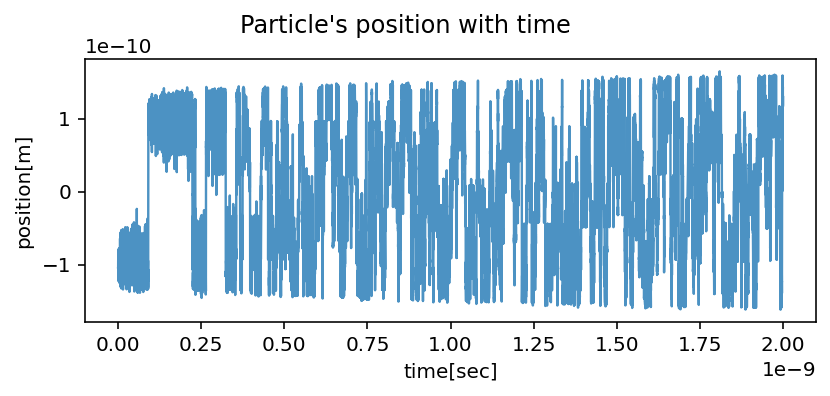

In [1]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN

fig = plt.figure(figsize=(6,3), dpi=144)
fig.suptitle("Particle's position with time", fontsize=12, y=0.90)
plt.xlabel('time[sec]', fontsize=10)
plt.ylabel('position[m]', fontsize=10)

R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15
sim = Simulation(dt=dt, L=5e-10, Nsteps=2000000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=1, 
                 NG=500, wtm=False)
sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
FES = sim.VG
xgrid = sim.RG
sim.__del__()

positions = list()
with open('sim.xyz') as file:
    for line in file:
        if 'Step' in line:
            step = float(line.split()[1])
        if 'Ar' in line:
            positions.append([step*dt,float(line.split()[1])])
positions = np.array(positions)
x,y = positions.T
plt.plot(x,y, linewidth=1.2, linestyle='-', alpha=0.8)

plt.tight_layout()

# plt.savefig('Final/Metadynamics2M.png', bbox_inches='tight')

#### Deriving FES - one simulation

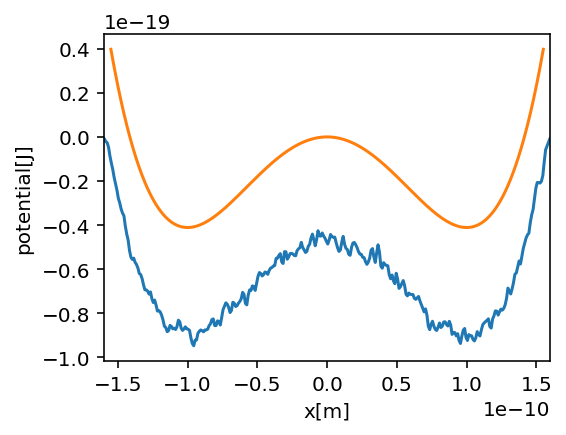

In [34]:
fig = plt.figure(figsize=(4,3), dpi=144)
plt.xlabel('x[m]')
plt.ylabel('potential[J]')
plt.xlim(-1.6e-10, 1.6e-10)

plt.plot(xgrid, -FES)

A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2
plt.plot(x, V)

# plt.savefig('Final/FES.png', bbox_inches='tight')

#### Deriving FES - five simulations

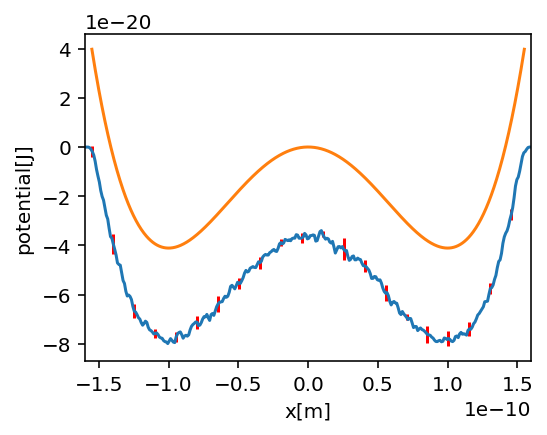

In [144]:
fig = plt.figure(figsize=(4,3), dpi=144)
plt.xlabel('x[m]')
plt.ylabel('potential[J]')
plt.xlim(-1.6e-10, 1.6e-10)

seeds = np.linspace(347, 937142, 5, dtype=int)
R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15

FES_five = list()

for seed in seeds:
    sim = Simulation(dt=dt, L=5e-10, Nsteps=1000000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=100, 
                 NG=300, wtm=False, seed=seed)
    sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
    FES = sim.VG
    xgrid = sim.RG
    sim.__del__()
    FES_five.append((xgrid, -FES))

f = np.array([FES_five[0][1], FES_five[1][1], FES_five[2][1], FES_five[3][1], FES_five[4][1]])
mean = np.mean(f, axis=0)
std = np.std(f, axis=0)
plt.errorbar(FES_five[0][0] ,mean, yerr=std, errorevery=15, ecolor='red')

A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2
plt.plot(x, V)

# plt.savefig('Final/FES_five.png', bbox_inches='tight')

### Well tempered metadynamics

#### Position of particle

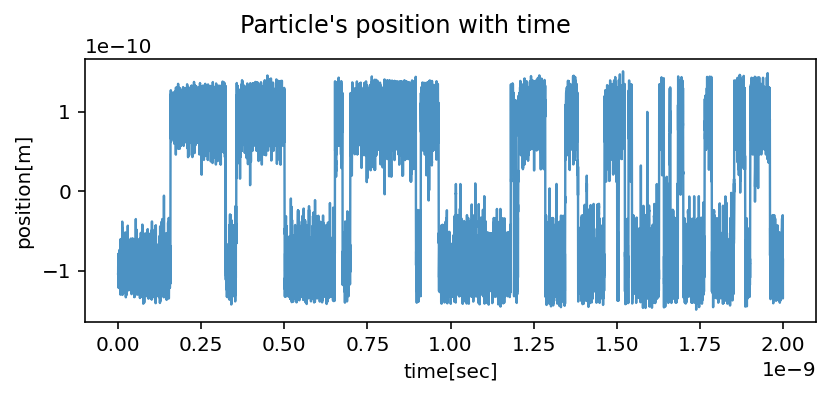

In [145]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN

fig = plt.figure(figsize=(6,3), dpi=144)
fig.suptitle("Particle's position with time", fontsize=12, y=0.90)
plt.xlabel('time[sec]', fontsize=10)
plt.ylabel('position[m]', fontsize=10)

R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15
sim = Simulation(dt=dt, L=5e-10, Nsteps=2000000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=1, 
                 NG=500, wtm=True)
sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
R_wtm = sim.R_wtm
VG_wtm = sim.VG_wtm
ct_wtm = sim.ct_wtm
beta = sim.beta
sim.__del__()

positions = list()
with open('sim.xyz') as file:
    for line in file:
        if 'Step' in line:
            step = float(line.split()[1])
        if 'Ar' in line:
            positions.append([step*dt,float(line.split()[1])])
positions = np.array(positions)
x,y = positions.T
plt.plot(x,y, linewidth=1.2, linestyle='-', alpha=0.8)

plt.tight_layout()

# plt.savefig('Final/Metadynamics2Mwtm.png', bbox_inches='tight')

#### Deriving FES - one simulation

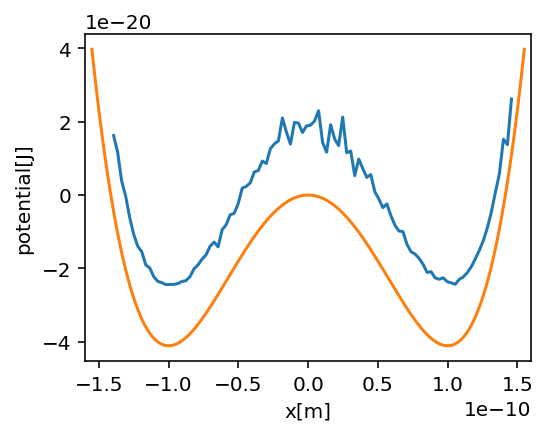

In [146]:
fig = plt.figure(figsize=(4,3), dpi=144)
plt.xlabel('x[m]')
plt.ylabel('potential[J]')
plt.xlim(-1.6e-10, 1.6e-10)

reweight = np.exp(beta * (VG_wtm - ct_wtm))
counts, bins = np.histogram(R_wtm, bins=100, weights = reweight)
plt.plot(bins[1:][counts!=0], -1/beta * np.log(counts[counts!=0]))

A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2
plt.plot(x, V)

# plt.savefig('Final/FES_mtw.png', bbox_inches='tight')

#### Deriving FES - ten simulations

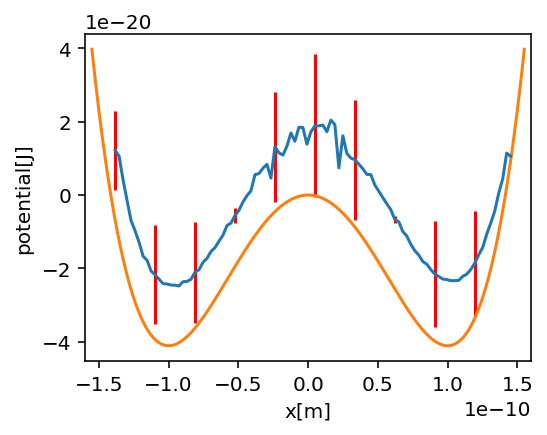

In [2]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN

fig = plt.figure(figsize=(4,3), dpi=144)
plt.xlabel('x[m]')
plt.ylabel('potential[J]')
plt.xlim(-1.6e-10, 1.6e-10)

seeds = np.linspace(347, 937142, 10, dtype=int)
R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15

FES_wtm_five = list()

for seed in seeds:
    sim = Simulation(dt=dt, L=5e-10, Nsteps=2000000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=1000, 
                 NG=500, wtm=True, seed=seed)
    sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
    R_wtm = sim.R_wtm
    VG_wtm = sim.VG_wtm
    ct_wtm = sim.ct_wtm
    beta = sim.beta
    sim.__del__()
    reweight = np.exp(beta * (VG_wtm - ct_wtm))
    counts, bins = np.histogram(R_wtm, bins=100, weights = reweight)
    FES_wtm_five.append((bins, counts))

f = np.array([FES_wtm_five[0][1], FES_wtm_five[1][1], FES_wtm_five[2][1], FES_wtm_five[3][1], FES_wtm_five[4][1]])
mean = np.mean(f, axis=0)
std = np.std(f, axis=0)

x = FES_wtm_five[0][0]
plt.errorbar(x[1:][mean!=0], -1/beta * np.log(mean[mean!=0]), 
             yerr= (-1/beta * np.log(std[mean!=0])), errorevery=10, ecolor='red')

A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2
plt.plot(x, V)

plt.savefig('Final/FES_mtw_10_2M.png', bbox_inches='tight')

In [183]:
f = np.array([FES_wtm_five[0][1], FES_wtm_five[1][1], FES_wtm_five[2][1], FES_wtm_five[3][1], FES_wtm_five[4][1]])

(-4e-20, 4e-20)

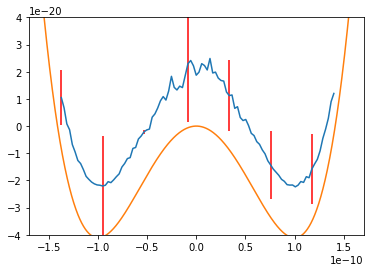

In [204]:
x = FES_wtm_five[0][0]
plt.errorbar(x[1:][mean!=0], -1/beta * np.log(mean[mean!=0]), yerr= -1/beta * np.log(std[mean!=0]), errorevery=15, ecolor='red')
A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2
plt.plot(x, V)
plt.ylim(-4e-20, 4e-20)

In [202]:
f = np.array([FES_wtm_five[0][1], FES_wtm_five[1][1], FES_wtm_five[2][1], FES_wtm_five[3][1], FES_wtm_five[4][1]])
FES_wtm_five[0][1], f[1][20]
# std = np.std(f, axis=0)

(array([1.86050703e-01, 1.50188499e-01, 4.11888729e-01, 1.70273538e+00,
        8.53015714e+00, 1.46495099e+01, 3.70911953e+01, 5.39459478e+01,
        7.11404278e+01, 1.79350401e+02, 1.74266717e+02, 2.20529657e+02,
        2.18850898e+02, 2.29899120e+02, 2.68968840e+02, 2.83752452e+02,
        3.30387426e+02, 1.56212423e+02, 2.11242047e+02, 2.08881574e+02,
        1.22555664e+02, 1.25463329e+02, 4.52833761e+01, 3.86385431e+01,
        2.16281687e+01, 1.26605705e+01, 1.10245456e+01, 1.46218790e+01,
        3.27223507e+00, 1.74775205e+00, 2.74850805e+00, 3.10456914e+00,
        2.54837956e+00, 5.70478571e-01, 3.75588131e-01, 3.73486676e-01,
        1.15264537e-01, 7.15198793e-03, 2.98833801e-01, 1.84826015e-02,
        5.08956800e-03, 0.00000000e+00, 1.37290025e-01, 9.07487600e-03,
        0.00000000e+00, 0.00000000e+00, 1.33543588e-02, 0.00000000e+00,
        7.00062754e-03, 1.79829173e-02, 0.00000000e+00, 5.08447336e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

## Introduction

### Well potential energy surface

Text(0, 0.5, 'potential [J]')

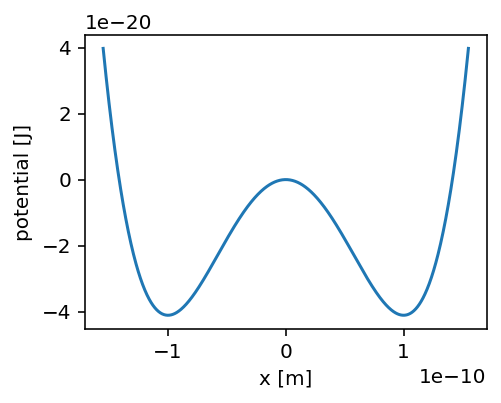

In [4]:
import matplotlib.pyplot as plt
import numpy as np

A = 4.11e20
B = 8.22
x = np.linspace(-1.55e-10, 1.55e-10, 1000)
V = A*x**4 - B*x**2

fig = plt.figure(figsize=(3.6,2.7), dpi=144)
plt.plot(x,V)
plt.xlabel('x [m]')
plt.ylabel('potential [J]')
# plt.savefig('Final/WellPotential.png', bbox_inches='tight')

### Particles position for two translation step sizes using MC

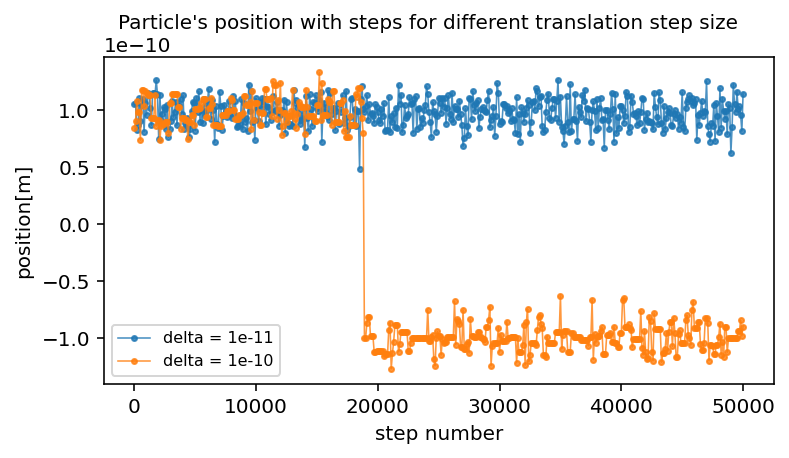

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sim import Simulation

R = np.array([[1.05e-10, 0.0, 0.0]])
mass = np.array([6.6335209e-26])
deltas = [1e-11, 1e-10]

sims_pos = list()

for delta in deltas:
    sim = Simulation(dt=1.0e-15, L=1.0, Nsteps=50000, R=R, mass=mass, deltaMC=delta,
                 kind=["Ar"], ftype="DoubleWell", printfreq=100,  outname="MCsim.log")
    sim.runMC(**{ "A": 4.11e20 , "B": 8.22 })
    sim.__del__()

    positions = list()
    with open('sim.xyz') as file:
        for line in file:
            if 'Step' in line:
                step = float(line.split()[1])
            if 'Ar' in line:
                positions.append([step,float(line.split()[1])])
            
    positions = np.array(positions)
    sims_pos.append(positions)

fig = plt.figure(figsize=(6,3), dpi=144)
fig.suptitle("Particle's position with steps for different translation step size", fontsize=10)
plt.xlabel('step number')
plt.ylabel('position[m]')

for positions in sims_pos:
    x,y = positions.T
    plt.plot(x,y, linewidth=0.8, linestyle='-', marker='o', markersize=2.5, alpha=0.8)
plt.legend(['delta = 1e-11', 'delta = 1e-10'], fontsize=8)

# plt.savefig('Final/PositionMC.png', bbox_inches='tight')

### Particles position and energy with time - NVE

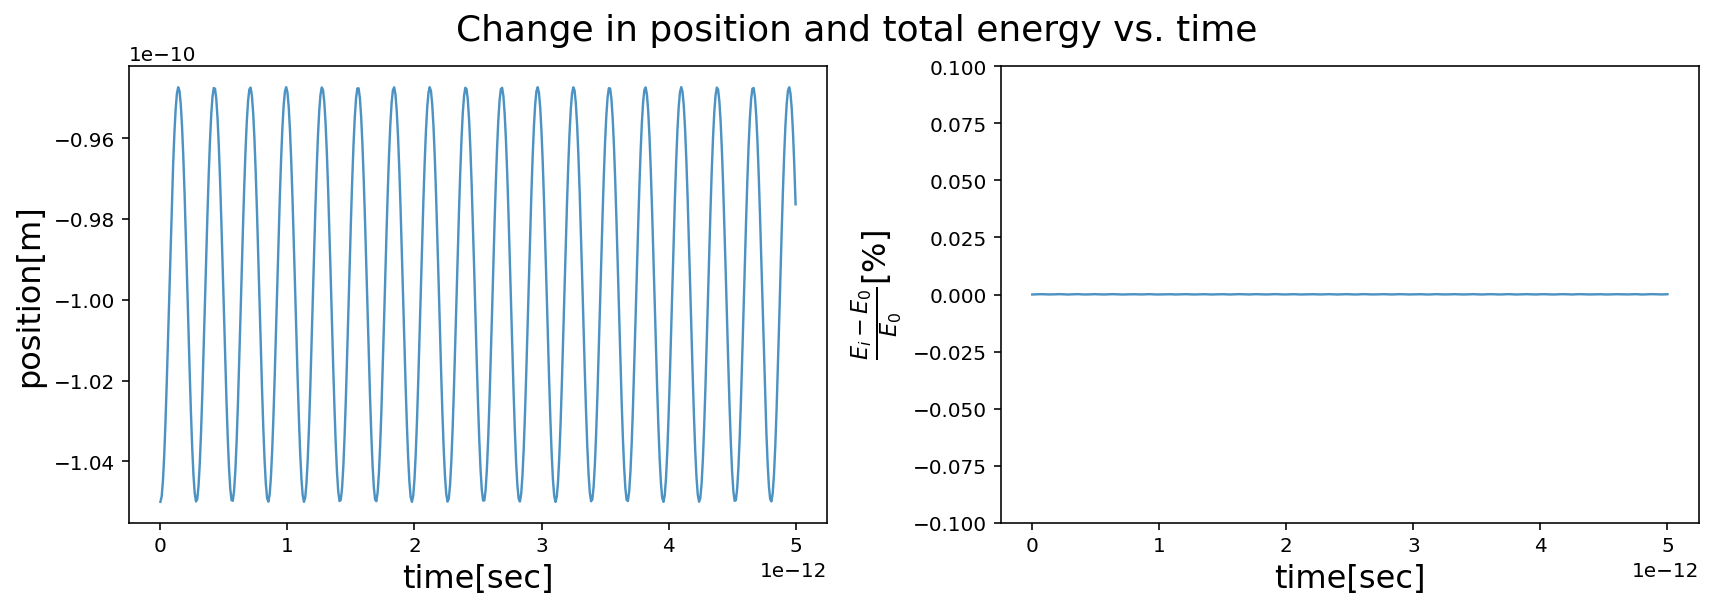

In [3]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4.5), dpi=144)
plt.subplots_adjust(hspace=0.1)
ax1.set_xlabel('time[sec]', fontsize=16)
ax1.set_ylabel('position[m]', fontsize=16)
ax2.set_xlabel('time[sec]', fontsize=16)
ax2.set_ylabel(r'$\frac{E_i-E_0}{E_0}[\%]$', fontsize=16)
fig.suptitle('Change in position and total energy vs. time', fontsize=18, y=0.93)

R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15
sim = Simulation(dt=dt, L=5e-10, Nsteps=5000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=10)
sim.run(**{ "A": 4.11e20 , "B": 8.22 })
sim.__del__()

positions = list()
with open('sim.xyz') as file:
    for line in file:
        if 'Step' in line:
            step = float(line.split()[1])
        if 'Ar' in line:
            positions.append([step*dt,float(line.split()[1])])
positions = np.array(positions)
x,y = positions.T
ax1.plot(x,y, linewidth=1.2, linestyle='-', alpha=0.8)

energies = list()
with open('sim.log') as file:
    file.readline()
    for line in file:
        ener = line.split()
        kin, pot, tot = float(ener[1]), float(ener[2]), (float(ener[1])+float(ener[2]))
        energies.append([kin, pot, tot])
energies = np.array(energies).T

change_energy = (energies[2]-energies[2][0])*100/energies[2][0]
ax2.plot(x, change_energy, linewidth=1.2, linestyle='-', alpha=0.8)
ax2.set_ylim([-0.1,0.1])
plt.tight_layout()

# plt.savefig('Final/PositionEnergyMD.png', bbox_inches='tight')

### Validation of langevine dynamics through temperature

Mean temperature: 311.324724285575
 STD of particle position: 1.2812636893428473e-11


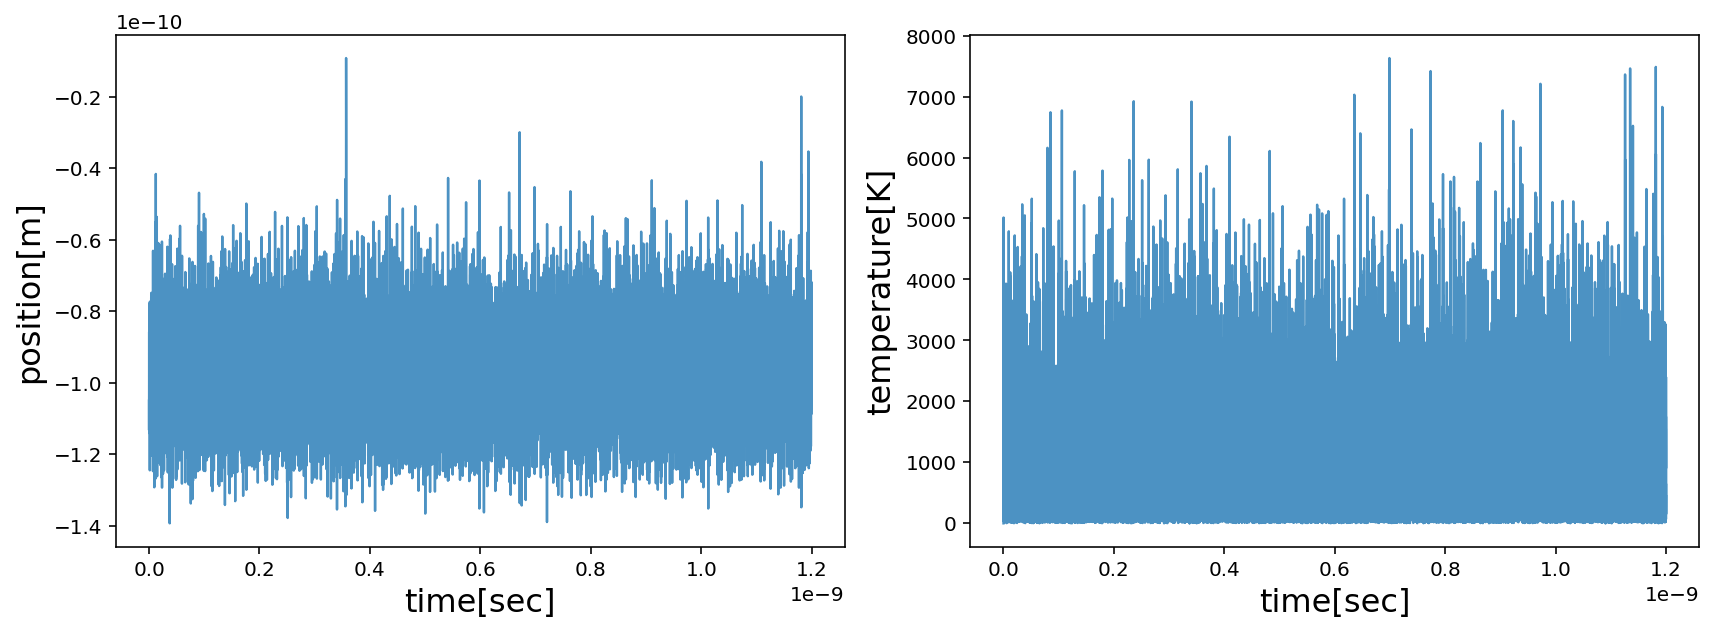

In [4]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4.5), dpi=144)
plt.subplots_adjust(hspace=0.1)
ax1.set_xlabel('time[sec]', fontsize=16)
ax1.set_ylabel('position[m]', fontsize=16)
ax2.set_xlabel('time[sec]', fontsize=16)
ax2.set_ylabel('temperature[K]', fontsize=16)

R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15
sim = Simulation(dt=dt, L=5e-10, Nsteps=1200000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=10, 
                 NG=10_000_000)
sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
sim.__del__()

positions = list()
with open('sim.xyz') as file:
    for line in file:
        if 'Step' in line:
            step = float(line.split()[1])
        if 'Ar' in line:
            positions.append([step*dt,float(line.split()[1])])
positions = np.array(positions)
x,y = positions.T
ax1.plot(x,y, linewidth=1.2, linestyle='-', alpha=0.8)

energies = list()
with open('sim.log') as file:
    file.readline()
    for line in file:
        ener = line.split()
        kin, pot, tot = float(ener[1]), float(ener[2]), (float(ener[1])+float(ener[2]))
        energies.append([kin, pot, tot])
energies = np.array(energies).T
temperature = 2 * energies[0] / BOLTZMANN
mean = np.mean(temperature[5:]) / 3 # since we used 3D
ax2.plot(x, temperature, linewidth=1.2, linestyle='-', alpha=0.8)
plt.tight_layout()
print(f"Mean temperature: {mean}\n STD of particle position: {np.std(y)}")

# plt.savefig('Final/Langevine.png', bbox_inches='tight')

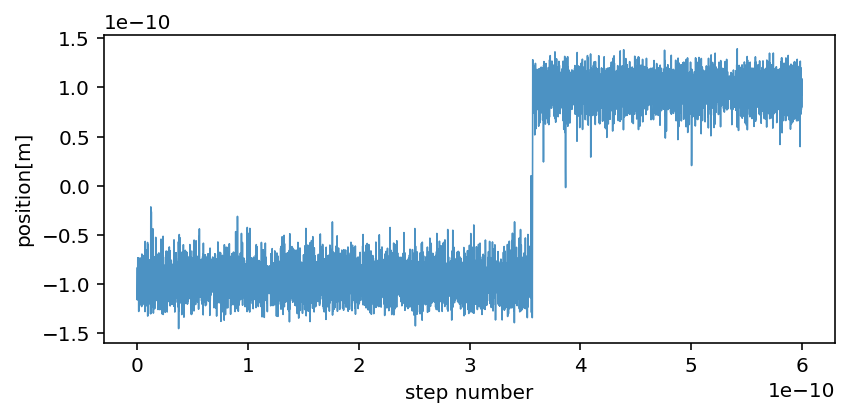

In [7]:
from sim import Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN

R = np.array([[-1.05e-10, 0.0, 0.0]]) # In meters
mass = np.array([6.6335209e-26]) # Argon mass 
dt = 1.0e-15
sim = Simulation(dt=dt, L=5e-10, Nsteps=600000, R=R, mass=mass, kind=["Ar"], ftype="DoubleWell", printfreq=10, 
                 NG=10_000_000, temp=400)
sim.runMeta(**{ "A": 4.11e20 , "B": 8.22 })
sim.__del__()

positions = list()
with open('sim.xyz') as file:
    for line in file:
        if 'Step' in line:
            step = float(line.split()[1])
        if 'Ar' in line:
            positions.append([step*dt,float(line.split()[1])])
positions = np.array(positions)
x,y = positions.T

fig = plt.figure(figsize=(6,3), dpi=144)
plt.plot(x,y, linewidth=0.8, linestyle='-', alpha=0.8)
plt.xlabel('step number')
plt.ylabel('position[m]')

plt.tight_layout()

# plt.savefig('Final/Langevine400K.png', bbox_inches='tight')